# Homology of graphs

We will define the homology of graphs with a perspective that extends naturally to their higher-dimensional generalizations.

---

**Computational objective**

Understand how to use bases to operate on matrices to compute homology.

---

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

## Definitions

A **directed multigraph** is a multigraph where the edges are (ordered) pairs of vertices.

Let $G = (V, E)$ be a directed multigraph, which will be omitted from the notation when convenient.

Let us fix a ground field over which all vector spaces will be considered.

Define $C_0$ and $C_1$ as the vector spaces generated by $V$ and $E$, respectively.  
Elements in these vector spaces are referred to as **chains** of degree 0 and 1 respectively.

Let $\partial \colon C_1 \to C_0$ be the linear map, referred to as the **boundary map**, defined on basis elements by:

$$
\partial(v, w) = w - v.
$$

Chains in the subvector space $\operatorname{img}(\partial)$ are referred to as **boundaries**, whereas chains in the subvector space $\operatorname{ker}(\partial)$ are referred to as **cycles**.

The **degree 0 homology** of $G$, denoted $H_0$, is the quotient of the vector space $C_0$ by $\operatorname{img}(\partial)$:

$$
H_0 = C_0 / \operatorname{img}(\partial).
$$

In particular, $\operatorname{dim} H_0 = \operatorname{dim} C_0 - \operatorname{dim} \operatorname{img}(\partial)$.

The **degree $1$ homology** of $G$, denoted $H_1$, is the vector space $\operatorname{ker}(\partial)$:

$$
H_1 = \operatorname{ker}(\partial).
$$

In particular, $\operatorname{dim} H_1 = \operatorname{dim} \operatorname{ker}(\partial)$.

---

For later generalizations, it is convenient to consider two additional boundary maps which are defined to be zero:

$$
0 \xleftarrow{\partial_0} C_0 \xleftarrow{\partial_1} C_1 \xleftarrow{\partial_2} 0.
$$

Explicitly, $\partial_0 = 0$, $\partial_1 = \partial$, and $\partial_2 = 0$.

With this notation:

$$
H_k \cong \frac{\operatorname{ker}(\partial_k)}{\operatorname{img}(\partial_{k+1})}
$$

for any $k \in \{0, 1\}$.

---

#### Challenge 1

A multigraph can be transformed into a directed multigraph by arbitrarily assigning a direction to its edges.  
Prove that the resulting homology (is up to isomorphism) independent of the assigned directions.

---

## Interpretation

Intuitively:
- $H_0$ encodes the connected components of the graph.
- $H_1$ encodes the independent loops in the graph.

The following challenges make these statements precise.

---

#### Challenge 2

Prove that two vertices belong to the same homology class if and only if they are part of the same connected component.

This implies that the dimension of $H_0$ corresponds to the number of connected components in the graph.

---

#### Challenge 3

Prove that any undirected loop defines a homology class and that every class in $H_1$ can be expressed as a linear combination of these classes.

This implies that the dimension of $H_1$ equals the number of linearly independent loops in the graph.

---


## Boundary matrix

Let $B$ be the matrix representating $\partial$ with respect to the canonical bases $V$ and $E$ ordered arbitrarily.

Since $\operatorname{dim}\mathrm{img}(\partial) = \operatorname{rank}(B)$ we have

$$
\operatorname{dim} H_0 = |V| - \operatorname{rank}(B).
$$

The rank-nullity theorem gives

$$
\operatorname{dim} H_1 = |E| - \operatorname{rank}(B).
$$

---

#### Challenge 2

Observe that the Euler characteristic of a multigraph $G$ is equal to

$$
\chi(G) = \operatorname{dim} H_0 - \operatorname{dim} H_1.
$$

---

The boundary matrix depends on the specific linear order chosen for the nodes and edges of the graph.
However, its rank remains invariant under different orderings, so we generally do not need to be overly concerned with the ordering.

That said, to ensure clarity and facilitate the identification of rows and columns of the boundary matrix with specific vertices and edges, below we adopt a principled ordering of nodes and edges.
This approach helps maintain consistency and makes the matrix more interpretable.

In [ ]:
def boundary_matrix(G):
    """
    Constructs the boundary matrix of a directed graph.

    Parameters
    ----------
    G : networkx.DiGraph
        A directed graph represented as a NetworkX DiGraph.

    Returns
    -------
    numpy.ndarray
        A 2D numpy array of shape `(number of nodes, number of edges)`
        representing the boundary matrix of the graph.

    Notes
    -----
    Similar to `networkx.incidence_matrix` with `oriented=True`.
    """
    # Index nodes and edges
    nodes, edges = list(G.nodes()), list(G.edges())

    # Initialize a boundary matrix
    boundary_matrix = np.zeros((len(nodes), len(edges)), dtype=int)

    # Fill the boundary matrix
    for edge_idx, (u, v) in enumerate(edges):
        u_idx = nodes.index(u)  # Row index for the source node
        v_idx = nodes.index(v)  # Row index for the target node
        boundary_matrix[u_idx, edge_idx] = -1
        boundary_matrix[v_idx, edge_idx] = 1

    return boundary_matrix

Let us now initialize a directed graph making sure both edges and vertices are canonically ordered.

Nodes: [0, 1, 2, 3, 4, 5]
Edges: [(0, 1), (0, 2), (1, 2), (3, 4), (3, 5), (4, 5)]



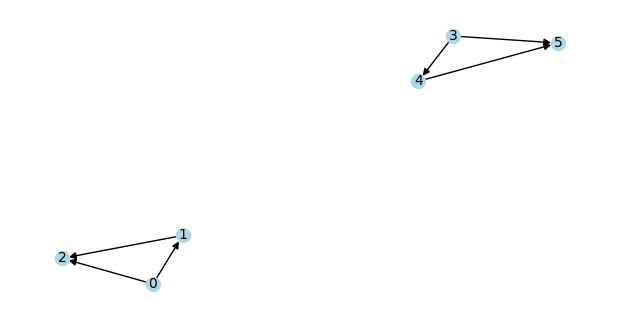


Boundary matrix:
[[-1 -1  0  0  0  0]
 [ 1  0 -1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  0 -1 -1  0]
 [ 0  0  0  1  0 -1]
 [ 0  0  0  0  1  1]]


In [ ]:
# Create a directed graph with ordered nodes and edges
G = nx.DiGraph()
edges = [(3, 5), (0, 1), (1, 2), (0, 2), (3, 4), (4, 5)]

# Order edges lexicographically
ordered_edges = sorted(edges)

# Extract and order nodes
ordered_nodes = sorted(set(node for edge in edges for node in edge))

# Add ordered nodes and edges to the directed graph
G.add_nodes_from(ordered_nodes)
G.add_edges_from(ordered_edges)

# Print ordered nodes and edges
print(f"Nodes: {G.nodes}")
print(f"Edges: {G.edges}\n")

# Draw the graph
pos = nx.spring_layout(G, seed=2)
plt.figure(figsize=(6, 3))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.show()

# Print the boundary matrix
B = boundary_matrix(G)
print(f"\nBoundary matrix:\n{B}")

Let us now compute the homology of the graph $G$ described above.
Since vector spaces are uniquely determined (up to isomorphism) by their dimensions, it suffices to determine $\operatorname{dim} H_0(G)$ and $\operatorname{dim} H_1(G)$.

In [ ]:
# Compute the rank of the boundary matrix
rank = np.linalg.matrix_rank(B)

# Compute the homology dimensions
dim_0 = B.shape[0] - rank
print(f"dim H_0 = {dim_0}")

dim_1 = B.shape[1] - rank
print(f"dim H_1 = {dim_1}\n")

# Compute a basis for the kernel of the boundary matrix.
basis_for_H1 = null_space(B)
print(np.around(basis_for_H1, decimals=1))

dim H_0 = 2
dim H_1 = 2

[[ 0.6 -0. ]
 [-0.6 -0. ]
 [ 0.6 -0. ]
 [-0.   0.6]
 [-0.  -0.6]
 [ 0.   0.6]]


## Functoriality

An important property of the homology construction is that it is *functorial*.
For our purposes, the most important special case of this property is the following:

**Theorem** If $G_{sub}$ is a directed submultigraph of $G$, then, for any degree $k \in \{0, 1\}$, the inclusion of vertices and edges induces a linear map

$$
\iota_k \colon H_k(G_{sub}) \to H_k(G).
$$

*Proof*. Since all the vertices and edges of $G_{sub}$ are vertices and edges of $G$ there is a natural inclusion of $C_k(G_{sub})$ into $C_k(G)$.
Any cycle in $C_1(G_{sub})$ is a cycle in $C_1(G)$, which defines the above inclusion for $k = 1$.
For $k = 0$, we must show that the map induced on chains preserves equivalence classes.
Since all edges of $H$ are in $G$, we have that $\operatorname{img} \partial_{sub} \subseteq \operatorname{img} \partial$.
So, given two representatives $c$ and $c'$ of the same homology class of $G_{sub}$, explicitly $c-c' \in \operatorname{img} \partial_{sub}$, they represent the same homology class in $G$ since $c-c' \in \operatorname{img} \partial$. &#9633;

---

#### Challenge 4

Show that for any three directed multigraphs $G \subseteq G' \subseteq G''$ and $k \in \{0, 1\}$ the map $H_k(G'') \to H_k(G)$ is equal to the composition of $H_k(G'') \to H_k(G')$ and $H_k(G') \to H_k(G)$.

---


In [ ]:
def draw_graphs_side_by_side(graph1, graph2, seed=9, figsize=(6, 3)):
    """
    Draws two directed graphs side-by-side with consistent vertex positioning.

    Parameters:
    - graph1: The first directed graph (e.g., subgraph).
    - graph2: The second directed graph (e.g., main graph).
    - seed: Seed for the spring layout to ensure consistent positioning.
    - figsize: Size of the figure.

    Returns:
    - None
    """
    # Define a consistent position for both graphs
    pos = nx.spring_layout(graph2, seed=seed)

    # Set up the plot with two side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Draw the first graph
    plt.sca(axes[0])
    nx.draw(graph1, pos, with_labels=True, node_color="lightgreen", label="Graph 1")
    plt.legend()

    # Draw the second graph
    plt.sca(axes[1])
    nx.draw(graph2, pos, with_labels=True, node_color="lightblue", label="Graph 2")
    plt.legend()

    plt.tight_layout()
    plt.show()

### Example 1: Interval

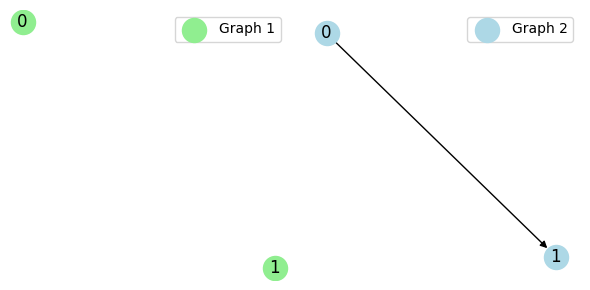

In [ ]:
# Create the subgraph
H = nx.DiGraph()
H.add_nodes_from([0, 1])
H.add_edges_from([])

# Create the graph
G = nx.DiGraph()
G.add_nodes_from([0, 1])
G.add_edges_from([(0, 1)])

draw_graphs_side_by_side(H, G)

Let us consider a specific example that illustrates the induced map.
Let $G_{sub}$ consist of two vertices $0$ and $1$, and let $G$ have these vertices and an additional (directed) edge $(0, 1)$.

There are no 1-cycles in either of these, so the map on degree 1 homology is the trivial map between trivial vector spaces.

For the degree 0 homology, we notice a priori by counting connected components that $\operatorname{dim} H_0(G_{sub}) = 2$ and $\operatorname{dim} H_0(G) = 1$.
So we expect the induced map to have rank 1.

The induced map at the level of chains is determined by $0 \mapsto 0$ and $1 \mapsto 1$.
So the induced map in homology is determined by $[0] \mapsto [0]$ and $[1] \mapsto [1]$, where $[\ell]$ denotes the homology class of $\ell \in \{0, 1\}$.

Since in $G$ both $[0]$ and $[1]$ represent the same class, the matrix representing $\iota_0$ in these ordered bases is

$$
\begin{pmatrix}
1 & 1
\end{pmatrix}.
$$

We can read off the rank of this matrix directly, but more systematically, we would transform it to its column reduced form and then count pivots.
In this case, we apply the transformation $Col_2 \leftarrow Col_2 - Col_1$ to obtain

$$
\begin{pmatrix}
1 & 0
\end{pmatrix},
$$

with a single pivot.
This transformation corresponds to changing the basis of $C_0(G_{sub})$ to $\{0, 1 - 0\}$.


### Example 2: Spliting a loop

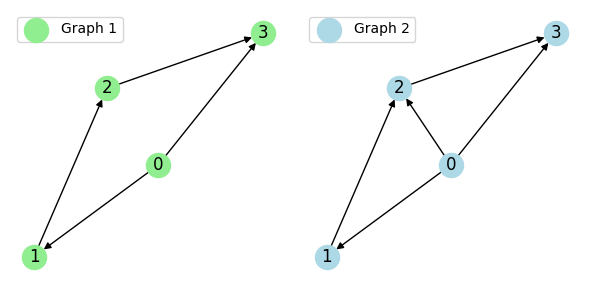

In [ ]:
# Create the subgraph
H = nx.DiGraph()
H.add_edges_from([(0, 1), (1, 2), (2, 3), (0, 3)])

# Create the graph
G = nx.DiGraph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (0, 3), (0, 2)])

draw_graphs_side_by_side(H, G)



Let $G_{sub}$ consist of four vertices and four (directed) edges $\{(0, 1), (1, 2), (2, 3), (0, 3)\}$ whereas $G$ contains the aditional edge $(0, 2)$.

Since both directed graphs are connected, is easy to see that the linear map induced on degree 0 homology is the identity.

For degree 1 homology, we count linearly independent cycles to obtain $\operatorname{dim}H_1(G_{sub}) = 1$ and $\operatorname{dim}H_1(G) = 2$.

To understand the induced map in homology, let us choose a basis for both vector spaces.
For $G_{sub}$ we choose

$$
[b_0] = \big[(0, 1) + (1, 2) + (2, 3) - (0, 3)\big]
$$

and for $G$ we choose

$$
[b_1] = \big[(0, 1) + (1, 2) - (0, 2)\big]
$$

and

$$
[b_2] = \big[(2, 3) - (0, 3) + (0, 2)\big].
$$

With respect to these ordered bases we have

$$
\begin{pmatrix}
1 \\ 1
\end{pmatrix}
$$

since $b_0 = b_1 + b_2$.

---

#### Challenge 4

Show that edge contraction preserves homology.
More explicitly, if $G'$ is obtained by contracting an edge of $G$, construct the natural function from the vertices of $G$ to the vertices of $G'$ and from the edges of $G$ to the edges of $G'$.
Notice that the induced map in homology is well-defined and a linear isomorphism.

---

#### Challenge 5

Show that $\beta_1(G)$, the first Betti number of $G$, which was defined in the previous notebook as the number of edges of the minimal model of $G$, agrees with the dimension of $H_1(G)$.

---